In [280]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as plt
import matplotlib.pyplot as plt 
data = pd.read_csv('C:/Users/ssssa/Desktop/Project/imdb/movie.csv')

In [281]:
import seaborn as sns
data['imdb_score'].median()

6.6

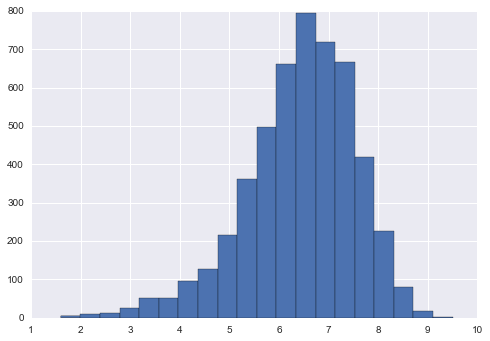

In [36]:

data['imdb_score'].hist(bins=20)

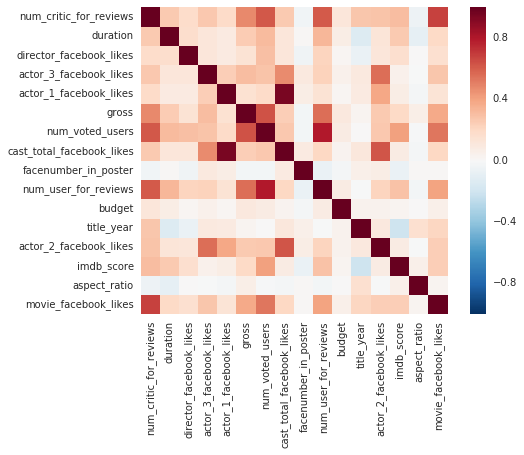

In [5]:
#plotting co-relation
corrmat = data.corr()
sns.heatmap(corrmat, vmax=1, square=True)

In [6]:
a= data.pivot_table(index='title_year', values= 'color', aggfunc=len)
a.head()

title_year
1916.0    1
1920.0    1
1925.0    1
1927.0    1
1929.0    2
Name: color, dtype: int64

In [7]:
idex=a.index
value= a.values

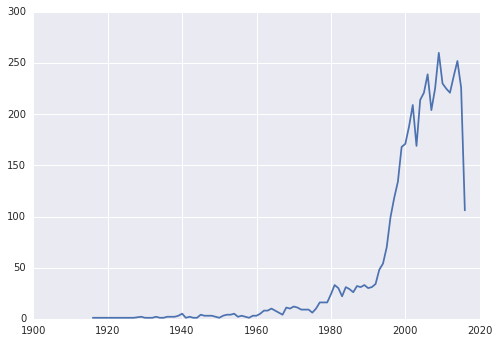

In [11]:
sns.plt.plot(idex,value)

In [13]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [14]:
lag= data.groupby('language')['movie_title'].count()

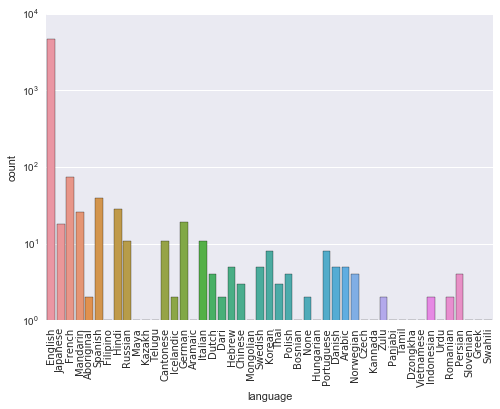

In [42]:
a=sns.countplot(x='language',data= data)
a.set_yscale('log')
lables= a.get_xticklabels()
a.set_xticklabels(lables, rotation=90)

In [44]:
data['plot_keywords'].head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [51]:
#data['a']= data['plot_keywords'].map(lambda x: x.split('|'))
data=data.dropna()
a= data['plot_keywords'].map(lambda x:x.split('|'))
data['new1']=a

In [59]:
a.head(6)

0         [avatar, future, marine, native, paraplegic]
1    [goddess, marriage ceremony, marriage proposal...
2            [bomb, espionage, sequel, spy, terrorist]
3    [deception, imprisonment, lawlessness, police ...
5    [alien, american civil war, male nipple, mars,...
6      [sandman, spider man, symbiote, venom, villain]
Name: plot_keywords, dtype: object

In [65]:
df_plots = pd.Series(sum(a.values.tolist(), []))

In [66]:
df_plots.head(10)

0               avatar
1               future
2               marine
3               native
4           paraplegic
5              goddess
6    marriage ceremony
7    marriage proposal
8               pirate
9            singapore
dtype: object

In [55]:
c= df_plots.value_counts()

In [67]:
c.head(10)

love             147
friend           133
murder           131
death            102
police            89
new york city     74
alien             72
high school       71
fbi               65
boy               63
dtype: int64

In [80]:
d=c[c>50]

In [78]:
d

love             147
friend           133
murder           131
death            102
police            89
new york city     74
alien             72
high school       71
fbi               65
boy               63
school            58
prison            53
revenge           53
drugs             52
friendship        51
money             51
dtype: int64

In [131]:
a= data.dropna()
dire= a.groupby('director_name')['imdb_score'].sum()
dir_index= dire.sort_values(ascending='False',)[:40].index
d= pd.pivot_table(data=a[a['director_name'].isin(dir_index)], 
                  index=['director_name'],columns=['title_year'],values='imdb_score',aggfunc='sum')
d.head()
di = sns.FacetGrid(rating,col="director_name",col_wrap=5 )
di = di.map(plt.plot, "title_year", "imdb_score", marker = 'o')
di.set_xticklabels(rotation = 45)

title_year,1982.0,1986.0,1987.0,1991.0,1994.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2006.0,2007.0,2008.0,2009.0,2011.0,2016.0
director_name,,,,,,,,,,,,,,,,,,,
Aaron Seltzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN
Alan Metter,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex Zamm,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arthur Hiller,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bo Welch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df= data.groupby('director_name')['title_year'].count()
df_i = df[df.values>=18]
df_index= df.index.tolist()
df_i.shape
#This can be done as well as 
#df= data.groupby('director_name').count()
#direc= df[df.title_year>=5]
#direc.head() 

(4L,)

In [12]:
director_new= data[['director_name', 'title_year', 'imdb_score']]

In [13]:
new= director_new[director_new['director_name'].isin(df_index)]

In [14]:
#Resetting index is important
rating= new.groupby(['director_name','title_year'])['imdb_score'].mean().reset_index()
rating.head()
#rating['title_year'] = rating.title_year.astype(int)

,director_name,title_year,imdb_score
0,A. Raven Cruz,2005.0,1.9
1,Aaron Hann,2015.0,6.0
2,Aaron Schneider,2009.0,7.1
3,Aaron Seltzer,2006.0,2.7
4,Abel Ferrara,1996.0,6.6


In [ ]:
import seaborn as sns
di = sns.FacetGrid(rating,col="director_name",col_wrap=5 )
di = di.map(plt.plot, "title_year", "imdb_score", marker = 'o')
di.set_xticklabels(rotation = 45)

In [87]:
data['a']= data['genres'].map(lambda x:x.split('|'))
data['a'].head()

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
4                           [Documentary]
Name: a, dtype: object

In [160]:
listofwords=[]
budget=[]
time=[]
cgenre=[]
for i in range(len(data)):
    cgenre.append(data['a'][i][1:len(data['a'][i])] )
    for x in data['a'][i]:
        listofwords.append(x) 
        budget.append(data['budget'][i])
        time.append(data['title_year'][i])      

In [165]:
#listofwords=pd.DataFrame(listofwords)
#budget= pd.DataFrame(budget)
cgenre
cgenre_pd =pd.DataFrame(cgenre)
#listofwords.columns=['listofwords']
#print listofwords.head(8)
#print budget.head(6)


In [164]:
s1 = pd.Series(listofwords, name='genre_')
s2 = pd.Series(budget, name='budget')
s3 = pd.Series(time, name='year')
s4 = pd.Series(cgenre, name='cgenre')
new_genre= pd.concat([s1, s2, s3, s4], axis=1)
new_genre.head(9)

,genre_,budget,year,cgenre
0,Action,237000000.0,2009.0,"[Adventure, Fantasy, Sci-Fi]"
1,Adventure,237000000.0,2009.0,"[Adventure, Fantasy]"
2,Fantasy,237000000.0,2009.0,"[Adventure, Thriller]"
3,Sci-Fi,237000000.0,2009.0,[Thriller]
4,Action,300000000.0,2007.0,[]
5,Adventure,300000000.0,2007.0,"[Adventure, Sci-Fi]"
6,Fantasy,300000000.0,2007.0,"[Adventure, Romance]"
7,Action,245000000.0,2015.0,"[Animation, Comedy, Family, Fantasy, Musical, ..."
8,Adventure,245000000.0,2015.0,"[Adventure, Sci-Fi]"


In [76]:
new_genre_s=new_genre.groupby(['genre_', 'year'])['budget'].mean().reset_index()
print new_genre_s.head(18)

    genre_    year      budget
0   Action  1936.0   1200000.0
1   Action  1948.0   3000000.0
2   Action  1949.0   1000000.0
3   Action  1954.0   2000000.0
4   Action  1962.0   5550000.0
5   Action  1963.0   6800000.0
6   Action  1964.0   1600000.0
7   Action  1965.0   9000000.0
8   Action  1966.0   3500000.0
9   Action  1967.0   9500000.0
10  Action  1969.0   6622043.5
11  Action  1970.0  13550000.0
12  Action  1971.0   3325000.0
13  Action  1972.0   1700000.0
14  Action  1973.0   4400000.0
15  Action  1974.0  13000000.0
16  Action  1975.0    300000.0
17  Action  1976.0   9000000.0


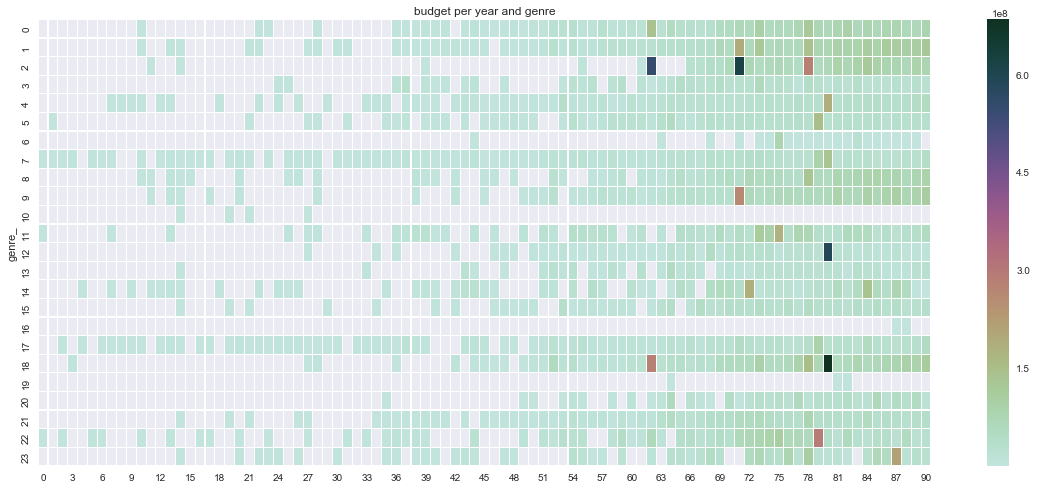

In [82]:
ploting= pd.pivot_table(data=new_genre_s, index='genre_', columns='year', values='budget', aggfunc=sum)
import matplotlib.pyplot as plt 
a,b = plt.subplots(figsize=(20,8))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(ploting.values,xticklabels = 3, cmap = cmap, linewidths = 0.05, ax = b)
plt.title('budget per year and genre')
plt.ylabel('genre_')

In [109]:
listofwords_new= listofwords.groupby('listofwords').size()
listofwords_new.head(8)

listofwords
Action         1153
Adventure       923
Animation       242
Biography       293
Comedy         1872
Crime           889
Documentary     121
Drama          2594
dtype: int64

In [112]:
listofwords_new_index=  listofwords_new.index
listofwords_new_value=listofwords_new.values

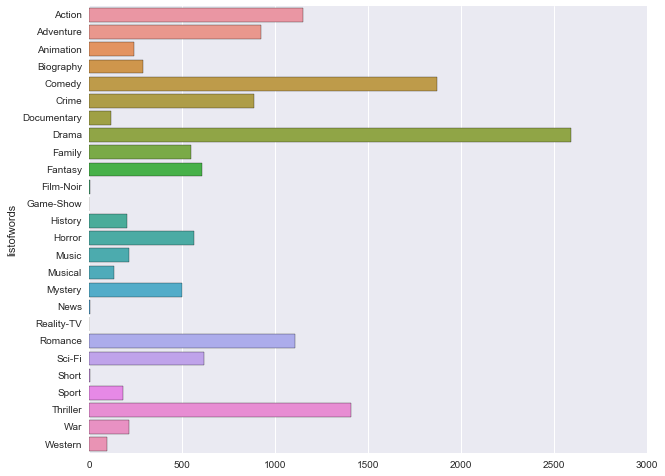

In [114]:
#print listofwords_new_index,listofwords_new_value
a,b = plt.subplots(figsize=(10,8))
sns.barplot(listofwords_new_value,listofwords_new_index)

In [239]:
a=data[['director_name','gross']].groupby('director_name')['gross'].sum().sort_values(ascending=False).head()
a = pd.DataFrame(a)
a.head()

,gross
director_name,
Steven Spielberg,4.114233e+09
Peter Jackson,2.592969e+09
Michael Bay,2.231243e+09
Tim Burton,2.071275e+09
Sam Raimi,2.049549e+09


In [255]:
#highest grosing movie by each director
asdf=data.groupby('director_name')['gross'].max()


In [262]:
asdf=asdf.dropna()
asdf=pd.DataFrame(asdf)
asdf=asdf.sort_values('gross', ascending='False').reset_index()
asdf.head(10)

,director_name,gross
0,Ekachai Uekrongtham,162.0
1,Frank Whaley,703.0
2,Robert Sarkies,728.0
3,Ian Fitzgibbon,828.0
4,Ricki Stern,1111.0
5,Alex Craig Mann,1332.0
6,Boris Rodriguez,1521.0
7,John D. Hancock,1711.0
8,U. Roberto Romano,2245.0
9,Paul Bunnell,2436.0


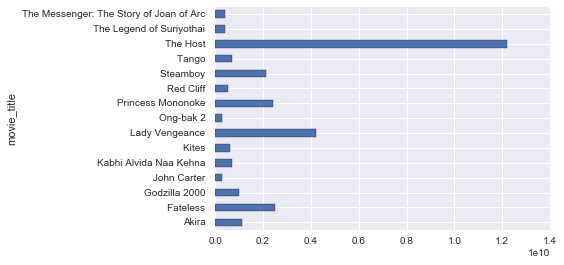

In [299]:
data['profit']= data.gross-data.budget
fails= data.sort_values(by='profit')[:15]
fails['budget'].groupby(fails['movie_title']).sum().plot.barh()
#fails['budget'].groupby(data['movie_title']).sum().plot.barh(stacked=True, title='Top-15 fails')

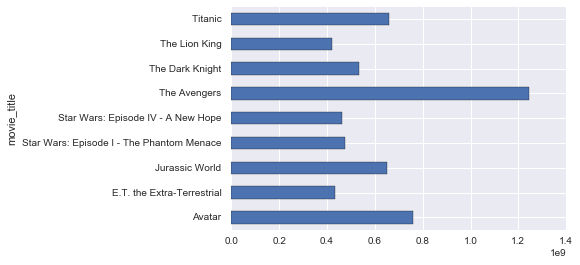

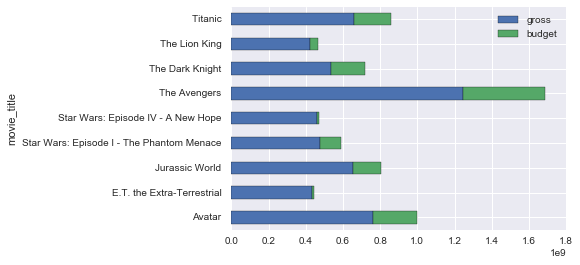

In [304]:
top= data.sort_values(by='profit', ascending = False).head(10)
top['gross'].groupby(top['movie_title']).sum().plot.barh(stacked=True)
top[['gross', 'budget']].groupby(top['movie_title']).sum().plot.barh(stacked=True)